In this notebook, we will cover:

* [Getting started with visualization](#Getting-Started)
* [Aesthetic mappings](#Aesthetic-Mappings)

Data visualization is an important skill to have for a data scientist. There are several tools available for data visualization. There are paid services/products offered by companies like [Tableau](https://www.tableau.com/) that let people generate high quality visualizations from data stored in speadsheets and databases. [D3.js](https://d3js.org/) is a Javascript library that uses a browser to display high quality, interactive graphics. Spreadsheet programs, such as Microsoft Excel, also offer visualization tools.

Since this is a course based on the R language, we will explore the visualization tools provided by the R language and packages. Even if we restrict ourselves to R, we have a few choices. The [R base graphics package](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/00Index.html) provides basic plotting tools that may be sufficient for many purposes. We will look at the [ggplot2 package](http://ggplot2.org/) that offers a higher level of abstraction to create graphics. For an interesting comparison between base R graphics and ggplots, see this [blog post](https://flowingdata.com/2016/03/22/comparing-ggplot2-and-r-base-graphics/).

Let us start by looking at the **mpg** data set that has information about city and highway mileages for various cars.

Let us load the **mpg** data frame.

In [1]:
options(repr.plot.width=6, repr.plot.height=4)
library(tidyverse)
print(mpg)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# A tibble: 234 x 11
   manufacturer model    displ  year   cyl trans   drv     cty   hwy fl    class
   <chr>        <chr>    <dbl> <int> <int> <chr>   <chr> <int> <int> <chr> <chr>
 1 audi         a4         1.8  1999     4 auto(l… f        18    29 p     comp…
 2 audi         a4         1.8  1999     4 manual… f        21    29 p     comp…
 3 audi         a4         2    2008     4 manual… f        20    31 p     comp…
 4 audi         a4         2    2008     4 auto(a… f        21    30 p     comp…
 5 audi         a4         2.8  1999     6 auto(l… f        16    26 p     comp…
 6 audi         a4         2.8  1999     6 manual… f        18    26 p     comp…
 7 audi         a4         3.1  2008     6 auto(a… f        18    27 p     comp…
 8 audi         a4 quat…   1.8  1999     4 manual… 4        18    26 p     comp…
 9 audi         a4 quat…   1.8  1999     4 auto(l… 4        16    25 p     comp…
10 audi         a4 quat…   2    2008     4 manual… 4        20    28 p     comp…
# … wit

A fundamental type of plot is a [scatter plot](https://en.wikipedia.org/wiki/Scatter_plot). It can be used to examine the relationship between 2 variables. Cartesian coordinates are used with one variable plotted along the x-axis and the other plotted along the y-axis. Let us create a scatter plot of the engine displacement **displ** (in liters) versus the highway mileage **hwy** (in mpg).

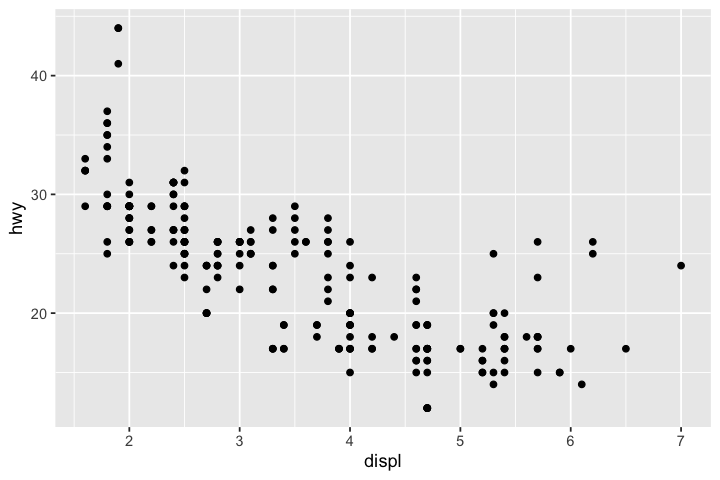

In [2]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy))

# Aesthetic Mappings

Let us pay close attention to the syntax here. It has the form:

```r
ggplot(data = <DATA>) +
    <GEOM_FUNCTION>(mapping = aes(<MAPPINGS>))
```

Scatter plots are useful for visualizing relationships between **continuous** variables, e.g., highway mileage and engine displacement above. Using them for **categorical** variables is not always very useful.

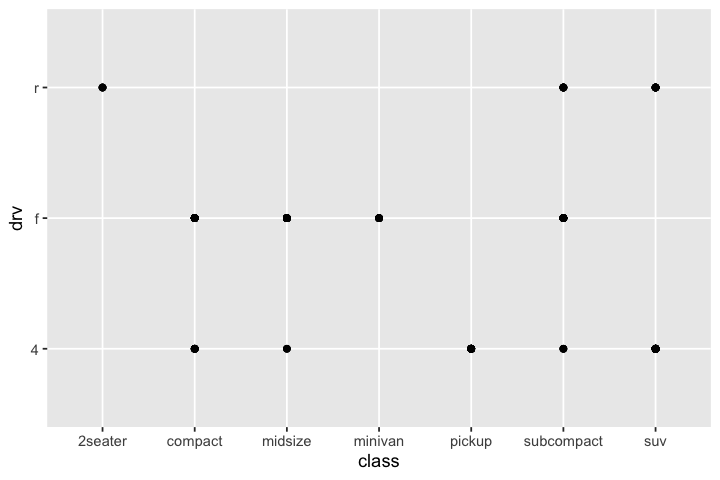

In [3]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = class, y = drv))

We can select a third variable and map to some **aesthetic** (i.e., visual property) of the points. Some examples are color, shape, size, and transparency.

Let us map the **class** variable to the **color** aesthetic in our **hwy** vs **displ** scatter plot.

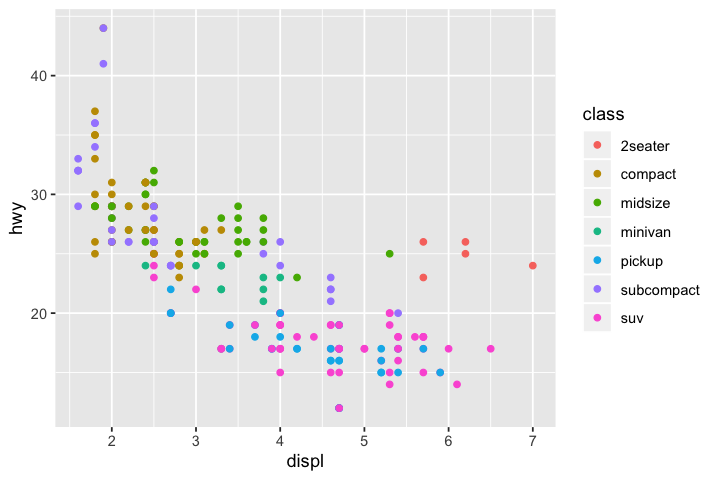

In [4]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy, color = class))

Note what ggplot did for us. It chose a unique value of **color** for a unique value of **class** and also displayed a legend explaining the choices.

Lets now map the **class** variable to the **shape** aesthetic.

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them.”
Warning message:
“Removed 62 rows containing missing values (geom_point).”


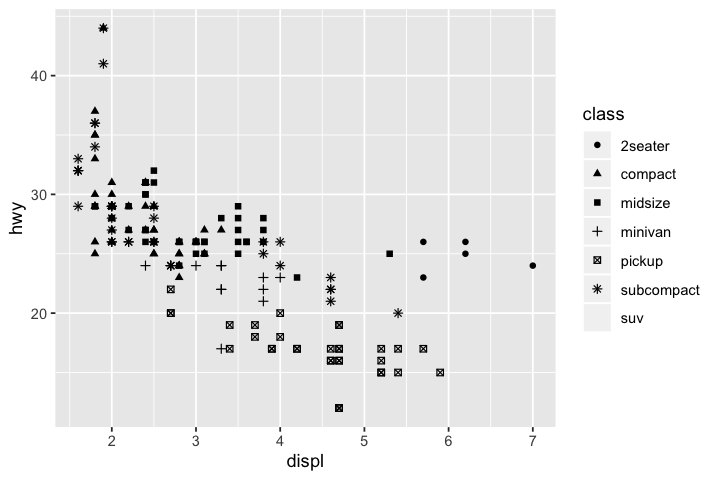

In [5]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy, shape = class))

We get a warning since, by default, only 6 shapes are used at a time but the **class** variable takes 7 values. In our case, points with SUV class went unplotted.

If we try to map a categorical variable **class** to a continuous aesthetic **size**, we get a warning.

Warning message:
“Using size for a discrete variable is not advised.”


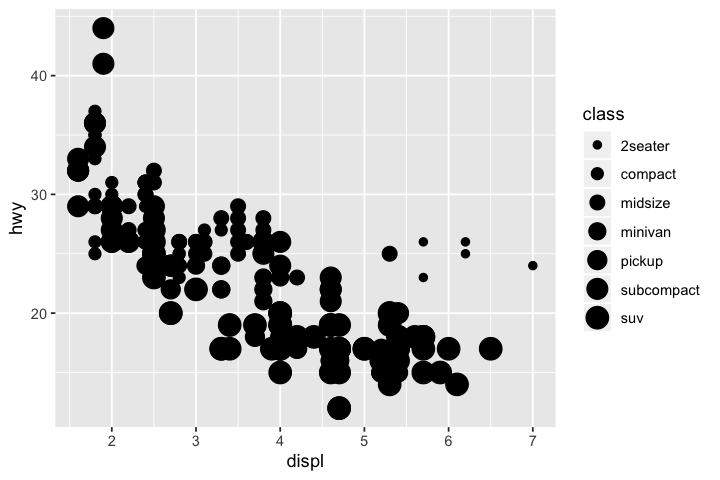

In [6]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy, size = class))

Next, let us map a continuous variable **cty** to a continuous aesthetic **size**.

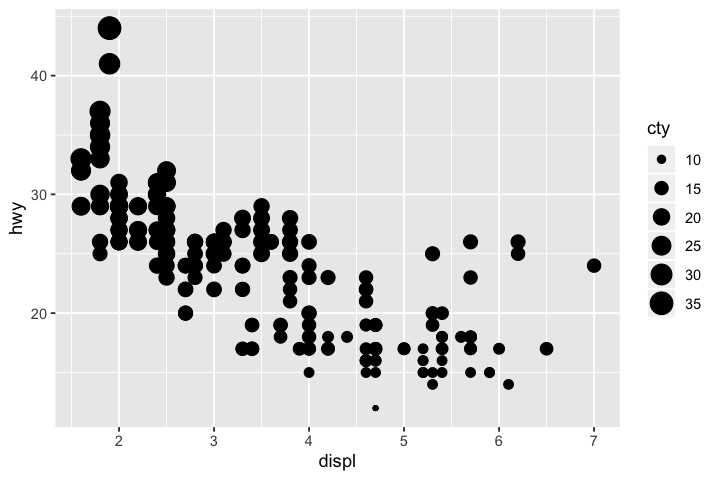

In [7]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy, size = cty))

**color** is an interesting aesthetic. It works even when we map a continuous variable to it but it works differently for continuous and categorical variables.

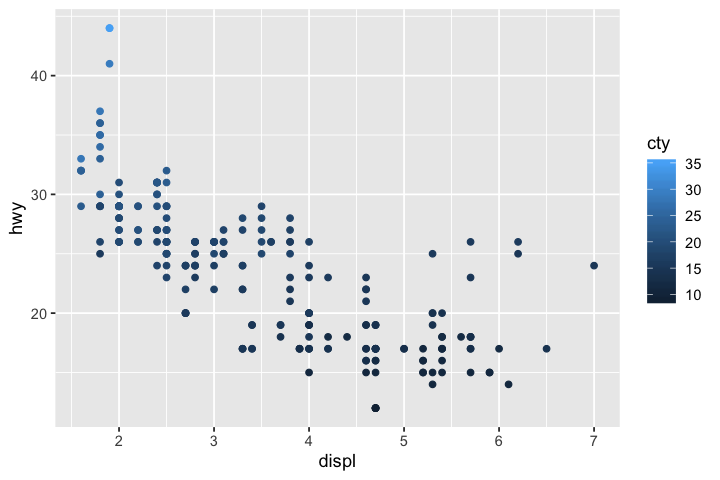

In [8]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy, color = cty))

An aesthetic need not be mapped directly to a variable. For example, we can map the color aesthetic to TRUE/FALSE depending on whether the **year** variable has a value less than 2000 or not.

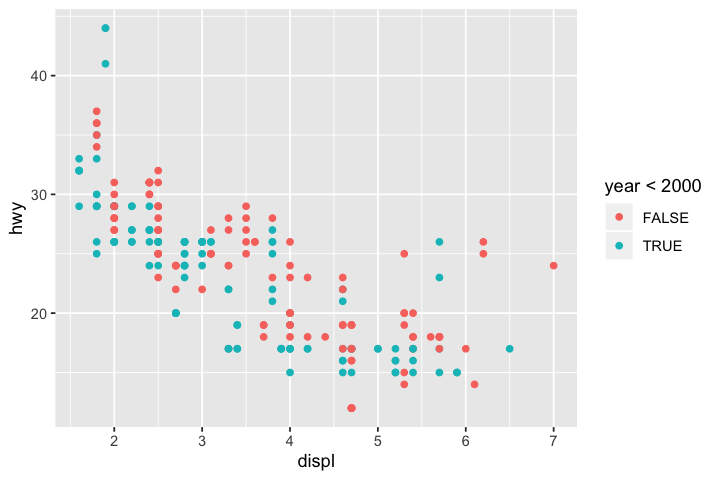

In [9]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy, color = year < 2000))